In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key


In [2]:
import citipy

In [3]:
from citipy import citipy

In [4]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = list(zip(lats, lngs))
lat_lngs

[(44.054751996354526, 21.054959852823117),
 (-5.490502919927522, 162.97743344402903),
 (6.4810044737056955, -13.974445017665289),
 (-87.0705392585049, 80.25517371917334),
 (-85.40625906187016, 28.395136271500178),
 (73.27911499084357, -59.83887840199618),
 (86.9820360092165, 42.91492181199402),
 (11.15863610036422, 114.17669399556968),
 (21.728041971089525, -86.60630689810203),
 (20.94307099888431, 56.27530578538793),
 (-5.1084543745862305, 13.108292501024948),
 (46.24403885927404, -56.217324816321224),
 (25.14913523980033, 66.5719777076518),
 (43.23778285306139, -53.54035152604891),
 (46.91603951047486, 85.50085831867165),
 (38.234926655295595, 154.45490187333587),
 (-81.26816352857361, 156.38016141265524),
 (43.371233037288704, -125.13101700470006),
 (5.243757640343631, 16.428795174460276),
 (63.1899463520802, -1.1565557180213375),
 (-55.11550649944518, 73.07105996056524),
 (52.60575371271716, -3.4267885737770314),
 (34.3958920740309, 44.78647714629179),
 (71.54937727919199, -150.422

In [6]:
len(lat_lngs)

1500

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in lat_lngs:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [8]:
url = f"https://api.openweathermap.org/data/2.5/weather?q={cities[0]}&appid={weather_api_key}"
print(url)


https://api.openweathermap.org/data/2.5/weather?q=batocina&appid=1e846faa821185d92b5aae70d3998274


In [9]:


# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
  # Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&London&units=imperial"
    #city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | batocina
Processing Record 2 of Set 1 | auki
Processing Record 3 of Set 1 | bonthe
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | kruisfontein
Processing Record 6 of Set 1 | upernavik
Processing Record 7 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 8 of Set 1 | taburi
City not found. Skipping...
Processing Record 9 of Set 1 | isla mujeres
Processing Record 10 of Set 1 | nizwa
Processing Record 11 of Set 1 | tshela
Processing Record 12 of Set 1 | saint-pierre
Processing Record 13 of Set 1 | karachi
Processing Record 14 of Set 1 | marystown
Processing Record 15 of Set 1 | zaysan
Processing Record 16 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | north bend
Processing Record 19 of Set 1 | baoro
Processing Record 20 of Set 1 | brae
Processing Record 21 of Set 1 | souillac
Processing Record 22 of Set 1 | llandrindod wells
Processing Rec

Processing Record 36 of Set 4 | thompson
Processing Record 37 of Set 4 | raufoss
Processing Record 38 of Set 4 | katherine
Processing Record 39 of Set 4 | awbari
Processing Record 40 of Set 4 | kitale
Processing Record 41 of Set 4 | tingi
Processing Record 42 of Set 4 | acarau
Processing Record 43 of Set 4 | dikson
Processing Record 44 of Set 4 | tunduru
City not found. Skipping...
Processing Record 45 of Set 4 | talnakh
Processing Record 46 of Set 4 | qaqortoq
Processing Record 47 of Set 4 | bairiki
Processing Record 48 of Set 4 | rusera
Processing Record 49 of Set 4 | ribeira grande
Processing Record 50 of Set 4 | imbituba
Processing Record 1 of Set 5 | tura
Processing Record 2 of Set 5 | itaberai
Processing Record 3 of Set 5 | karaul
City not found. Skipping...
Processing Record 4 of Set 5 | matara
Processing Record 5 of Set 5 | lorengau
Processing Record 6 of Set 5 | ahipara
Processing Record 7 of Set 5 | macapa
Processing Record 8 of Set 5 | rocha
Processing Record 9 of Set 5 | ho

Processing Record 25 of Set 8 | alofi
Processing Record 26 of Set 8 | lhuntshi
City not found. Skipping...
Processing Record 27 of Set 8 | narsaq
Processing Record 28 of Set 8 | gubkinskiy
Processing Record 29 of Set 8 | westport
Processing Record 30 of Set 8 | sao gabriel da cachoeira
Processing Record 31 of Set 8 | bogorodskoye
Processing Record 32 of Set 8 | dalvik
Processing Record 33 of Set 8 | batagay
Processing Record 34 of Set 8 | qui nhon
Processing Record 35 of Set 8 | broome
Processing Record 36 of Set 8 | sretensk
Processing Record 37 of Set 8 | andenes
Processing Record 38 of Set 8 | muisne
Processing Record 39 of Set 8 | novobirilyussy
Processing Record 40 of Set 8 | gamba
Processing Record 41 of Set 8 | temir
Processing Record 42 of Set 8 | nanjing
Processing Record 43 of Set 8 | ukholovo
Processing Record 44 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 45 of Set 8 | beyla
Processing Record 46 of Set 8 | sao joao da barra
Processing Record 47 of Set 

Processing Record 8 of Set 12 | olinda
Processing Record 9 of Set 12 | hovd
Processing Record 10 of Set 12 | diego de almagro
Processing Record 11 of Set 12 | kralendijk
Processing Record 12 of Set 12 | wajir
Processing Record 13 of Set 12 | quartucciu
Processing Record 14 of Set 12 | mutis
Processing Record 15 of Set 12 | kununurra
Processing Record 16 of Set 12 | grindavik
Processing Record 17 of Set 12 | inyonga
Processing Record 18 of Set 12 | skelleftea
Processing Record 19 of Set 12 | igrim
Processing Record 20 of Set 12 | ballina
Processing Record 21 of Set 12 | pevek
Processing Record 22 of Set 12 | comodoro rivadavia
Processing Record 23 of Set 12 | dubbo
Processing Record 24 of Set 12 | odweyne
Processing Record 25 of Set 12 | letterkenny
Processing Record 26 of Set 12 | eyl
Processing Record 27 of Set 12 | mahibadhoo
Processing Record 28 of Set 12 | camacha
Processing Record 29 of Set 12 | ksenyevka
City not found. Skipping...
Processing Record 30 of Set 12 | palmas
Processi

In [11]:
len(city_data)


561

In [12]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Batocina,44.1536,21.0817,60.15,54,4,2.46,RS,2021-08-13 01:22:00
1,Auki,-8.7676,160.7034,75.00,94,100,3.15,SB,2021-08-13 01:22:00
2,Bonthe,7.5264,-12.5050,76.51,89,100,7.43,SL,2021-08-13 01:22:00
3,Busselton,-33.6500,115.3333,48.04,79,100,5.91,AU,2021-08-13 01:22:01
4,Kruisfontein,-34.0033,24.7314,47.12,76,72,4.36,ZA,2021-08-13 01:22:01
5,Upernavik,72.7868,-56.1549,43.63,87,100,10.38,GL,2021-08-13 01:22:01
6,Isla Mujeres,21.2311,-86.7310,82.45,77,5,11.07,MX,2021-08-13 01:22:02
7,Nizwa,22.9333,57.5333,88.59,38,97,0.36,OM,2021-08-13 01:22:02
8,Tshela,-4.9833,12.9333,70.09,96,100,1.12,CD,2021-08-13 01:22:03
9,Saint-Pierre,-21.3393,55.4781,69.44,71,0,5.75,RE,2021-08-13 01:21:16


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", 
                    "Wind Speed"]

In [14]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Batocina,RS,2021-08-13 01:22:00,44.1536,21.0817,60.15,54,4,2.46
1,Auki,SB,2021-08-13 01:22:00,-8.7676,160.7034,75.00,94,100,3.15
2,Bonthe,SL,2021-08-13 01:22:00,7.5264,-12.5050,76.51,89,100,7.43
3,Busselton,AU,2021-08-13 01:22:01,-33.6500,115.3333,48.04,79,100,5.91
4,Kruisfontein,ZA,2021-08-13 01:22:01,-34.0033,24.7314,47.12,76,72,4.36
5,Upernavik,GL,2021-08-13 01:22:01,72.7868,-56.1549,43.63,87,100,10.38
6,Isla Mujeres,MX,2021-08-13 01:22:02,21.2311,-86.7310,82.45,77,5,11.07
7,Nizwa,OM,2021-08-13 01:22:02,22.9333,57.5333,88.59,38,97,0.36
8,Tshela,CD,2021-08-13 01:22:03,-4.9833,12.9333,70.09,96,100,1.12
9,Saint-Pierre,RE,2021-08-13 01:21:16,-21.3393,55.4781,69.44,71,0,5.75


In [15]:
# Create the output file (CSV)
output_data_file = 'weather_data/cities.csv'
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

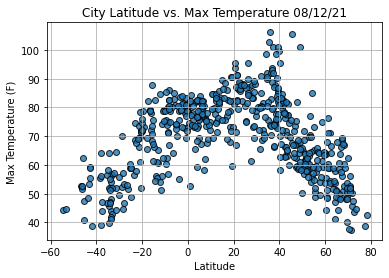

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

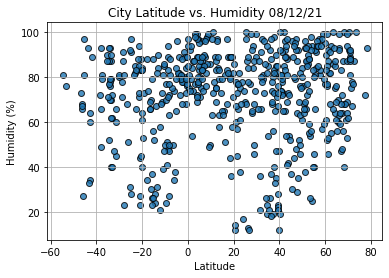

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

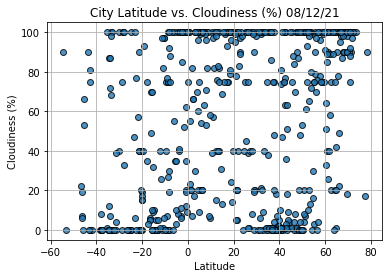

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

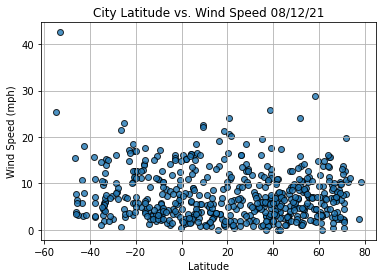

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [21]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [22]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
     # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)

    

In [23]:
# Remember loc: row = df.loc[row_index]
index13 = city_data_df.loc[13]
index13

City                        Bluff
Country                        NZ
Date          2021-08-13 01:22:04
Lat                         -46.6
Lng                      168.3333
Max Temp                    52.81
Humidity                       73
Cloudiness                     22
Wind Speed                  15.43
Name: 13, dtype: object

In [24]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

In [25]:
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

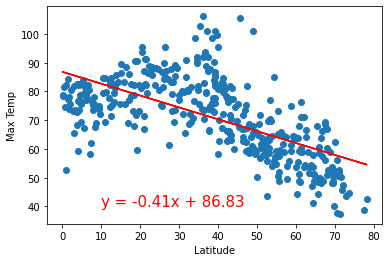

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \ for Maximum Temperature', 'Max Temp', (10,40))
plt.show()

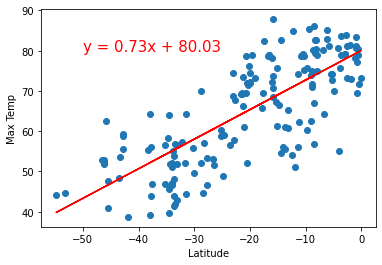

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80))

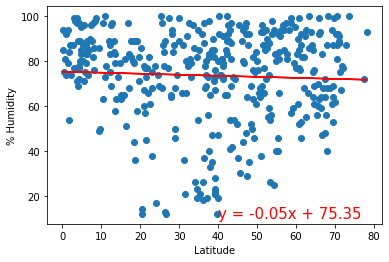

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

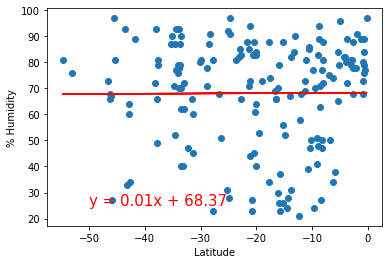

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,25))

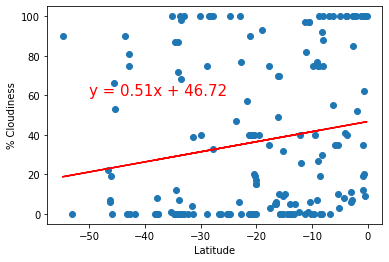

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

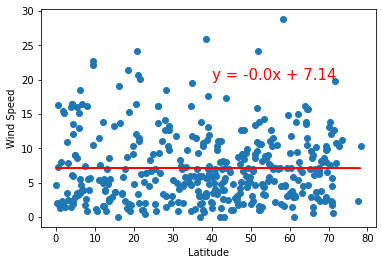

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,20))

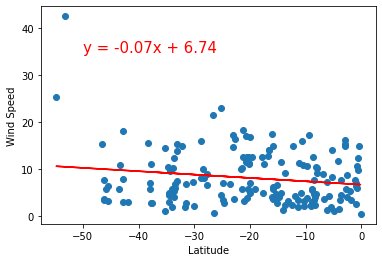

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [34]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
# Import the API key.
from config import g_key

In [35]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Batocina,RS,2021-08-13 01:22:00,44.1536,21.0817,60.15,54,4,2.46
1,1,Auki,SB,2021-08-13 01:22:00,-8.7676,160.7034,75.00,94,100,3.15
2,2,Bonthe,SL,2021-08-13 01:22:00,7.5264,-12.5050,76.51,89,100,7.43
3,3,Busselton,AU,2021-08-13 01:22:01,-33.6500,115.3333,48.04,79,100,5.91
4,4,Kruisfontein,ZA,2021-08-13 01:22:01,-34.0033,24.7314,47.12,76,72,4.36


In [37]:
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [38]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [52]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=temps, dissipating=False, max_intensity=300, point_radius=4)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [47]:
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp])

In [48]:
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))

In [53]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [55]:
# Heatmap of percent cloudiness
locations = city_data_df[["Lat", "Lng"]]
clouds = city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=clouds , dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [56]:
# Heatmap of Wind Speed
locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=wind , dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [57]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [58]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,1,Auki,SB,2021-08-13 01:22:00,-8.7676,160.7034,75.00,94,100,3.15
2,2,Bonthe,SL,2021-08-13 01:22:00,7.5264,-12.5050,76.51,89,100,7.43
6,6,Isla Mujeres,MX,2021-08-13 01:22:02,21.2311,-86.7310,82.45,77,5,11.07
7,7,Nizwa,OM,2021-08-13 01:22:02,22.9333,57.5333,88.59,38,97,0.36
10,10,Karachi,PK,2021-08-13 01:19:53,24.9056,67.0822,80.42,69,75,9.22
14,14,North Bend,US,2021-08-13 01:22:05,43.4065,-124.2243,77.23,88,1,8.05
23,23,Kapaa,US,2021-08-13 01:18:29,22.0752,-159.3190,86.32,66,40,1.01
26,26,Kumluca,TR,2021-08-13 01:22:09,36.3703,30.2869,83.03,37,0,9.26
27,27,Jamestown,US,2021-08-13 01:20:31,42.0970,-79.2353,78.39,85,75,8.01
28,28,Bethel,US,2021-08-13 01:22:09,41.3712,-73.4140,82.72,73,1,3.44


In [59]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
1,Auki,SB,75.00,-8.7676,160.7034,
2,Bonthe,SL,76.51,7.5264,-12.5050,
6,Isla Mujeres,MX,82.45,21.2311,-86.7310,
7,Nizwa,OM,88.59,22.9333,57.5333,
10,Karachi,PK,80.42,24.9056,67.0822,
14,North Bend,US,77.23,43.4065,-124.2243,
23,Kapaa,US,86.32,22.0752,-159.3190,
26,Kumluca,TR,83.03,36.3703,30.2869,
27,Jamestown,US,78.39,42.0970,-79.2353,
28,Bethel,US,82.72,41.3712,-73.4140,


In [60]:
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}

In [66]:
# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
  # Grab the first hotel from the results and store the name.
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except (IndexError):
        print("Hotel not found... skipping.")

Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.


In [67]:
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
1,Auki,SB,75.00,-8.7676,160.7034,Auki Motel
2,Bonthe,SL,76.51,7.5264,-12.5050,Bonthe Holiday Village
6,Isla Mujeres,MX,82.45,21.2311,-86.7310,Hotel La Joya Isla Mujeres
7,Nizwa,OM,88.59,22.9333,57.5333,Orient Apartments
10,Karachi,PK,80.42,24.9056,67.0822,Sadaat
14,North Bend,US,77.23,43.4065,-124.2243,Red Lion Hotel Coos Bay
23,Kapaa,US,86.32,22.0752,-159.3190,Sheraton Kauai Coconut Beach Resort
26,Kumluca,TR,83.03,36.3703,30.2869,TurkuazKöy
27,Jamestown,US,78.39,42.0970,-79.2353,Hampton Inn & Suites Jamestown
28,Bethel,US,82.72,41.3712,-73.4140,Courtyard by Marriott Danbury


In [69]:
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,
             dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [72]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""
# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

In [73]:
# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))